## Problem Statement

### In walmart Store Sales Prediction our main objective was to predicting stores weekly sales using historical markdown data.

This competition is evaluated on the weighted mean absolute error (WMAE):

  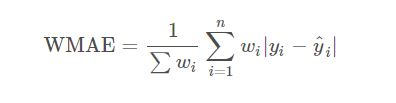

where

n is the number of rows

y^i is the predicted sales

yi is the actual sales

wi are weights. w = 5 if the week is a holiday week, 1 otherwise

In [732]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime
from sklearn import metrics


In [733]:
featues=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
train_f=pd.merge(train, stores)
train=pd.merge(train_f, featues)
#train['Weekly_Sales']=np.log(train['Weekly_Sales'])
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [734]:
test=pd.read_csv("test.csv")
test_f=pd.merge(test, stores)
test=pd.merge(test_f, featues)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


### Data Cleaning

In [735]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [736]:
train=train.fillna(0)

In [737]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [738]:
test['CPI'].fillna(test['CPI'].mean(), inplace=True)
test['Unemployment'].fillna(test['Unemployment'].mean(), inplace=True)
test['MarkDown1']=test['MarkDown1'].fillna(0)
test['MarkDown2']=test['MarkDown2'].fillna(0)
test['MarkDown3']=test['MarkDown3'].fillna(0)
test['MarkDown4']=test['MarkDown4'].fillna(0)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [739]:
## Checking % values
var =train['Weekly_Sales'].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -4988.94
10 percentile value is 291.1
20 percentile value is 1341.0
30 percentile value is 2913.39
40 percentile value is 4887.96
50 percentile value is 7612.03
60 percentile value is 11274.71
70 percentile value is 16619.5
80 percentile value is 25217.7
90 percentile value is 42846.96
100 percentile value is  693099.36


In [740]:
#looking further from the 99th percecntile
var =train['Weekly_Sales'].values
var = np.sort(var,axis = None)
for i in range(90, 100):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 42846.96
91 percentile value is 45630.2
92 percentile value is 48746.25
93 percentile value is 52290.27
94 percentile value is 56461.4
95 percentile value is 61202.05
96 percentile value is 67360.49
97 percentile value is 74898.99
98 percentile value is 85373.52
99 percentile value is 106485.52
100 percentile value is  693099.36


In [741]:
## removing the outliers
train=train[(train.Weekly_Sales>0) & (train.Weekly_Sales< 693099.36)]
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


### Exploratory Data Analysis

In [742]:
sales=train.Weekly_Sales.values
train['Date']=pd.to_datetime(train.Date)
test['Date']=pd.to_datetime(test.Date)

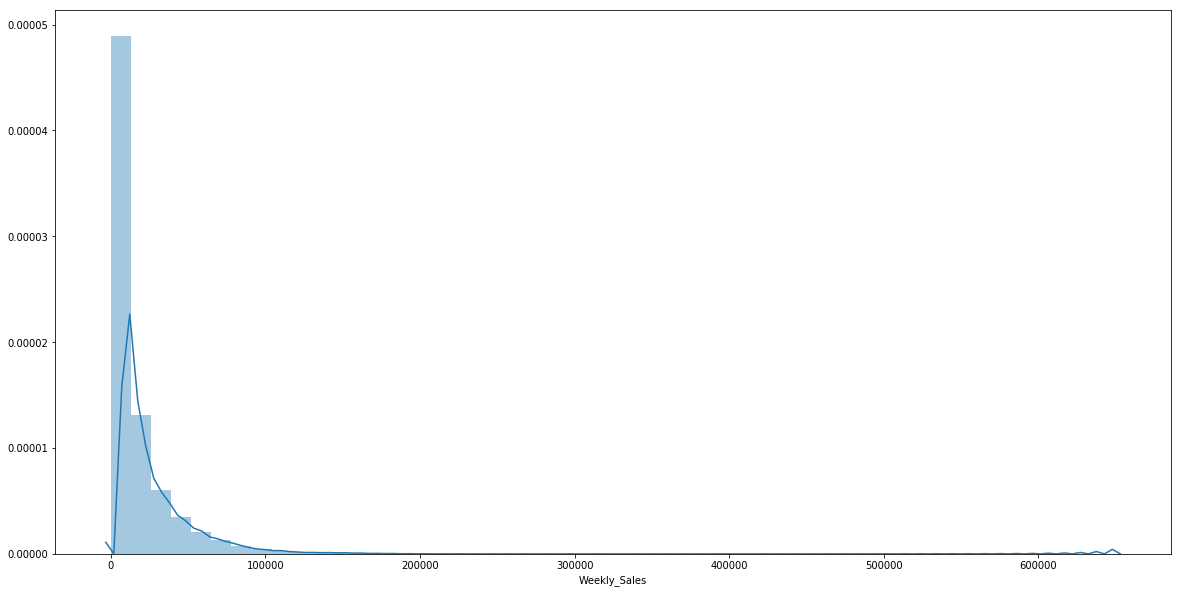

In [743]:
plt.figure(figsize=(20, 10))
sns.distplot(train['Weekly_Sales'])

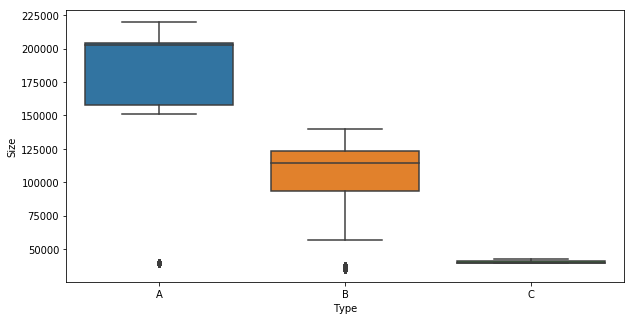

In [744]:
plt.figure(figsize=(10, 5))
sns.boxplot(train['Type'], train['Size'])

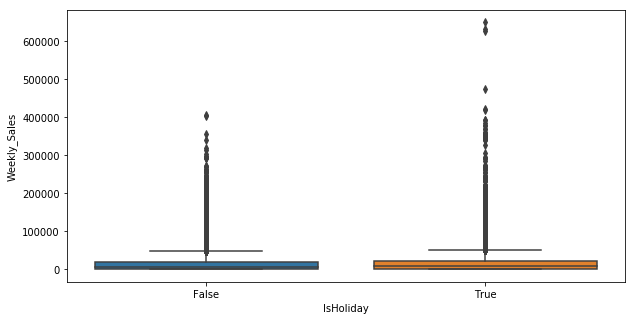

In [745]:
plt.figure(figsize=(10, 5))
sns.boxplot(train['IsHoliday'], train['Weekly_Sales'])

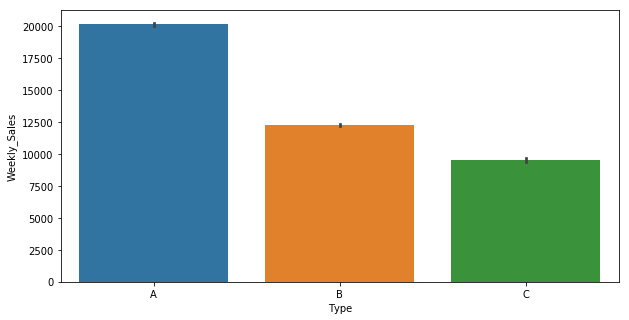

In [746]:
plt.figure(figsize=(10, 5))
sns.barplot(train['Type'], train['Weekly_Sales'])

Text(0.5,1,'Plot of Stores and Weekly Sales')

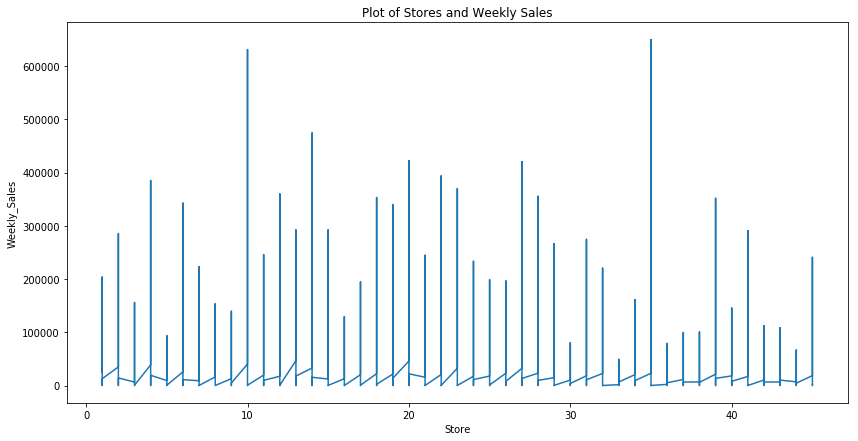

In [747]:
plt.figure(figsize=(14, 7))
plt.plot(train['Store'], train['Weekly_Sales'])
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.title("Plot of Stores and Weekly Sales")

In [748]:
train_group_by_date=train.groupby(['Date', 'Store'])['Weekly_Sales'].agg(sum).reset_index()

Text(0.5,1,'Plot of Date and Sales')

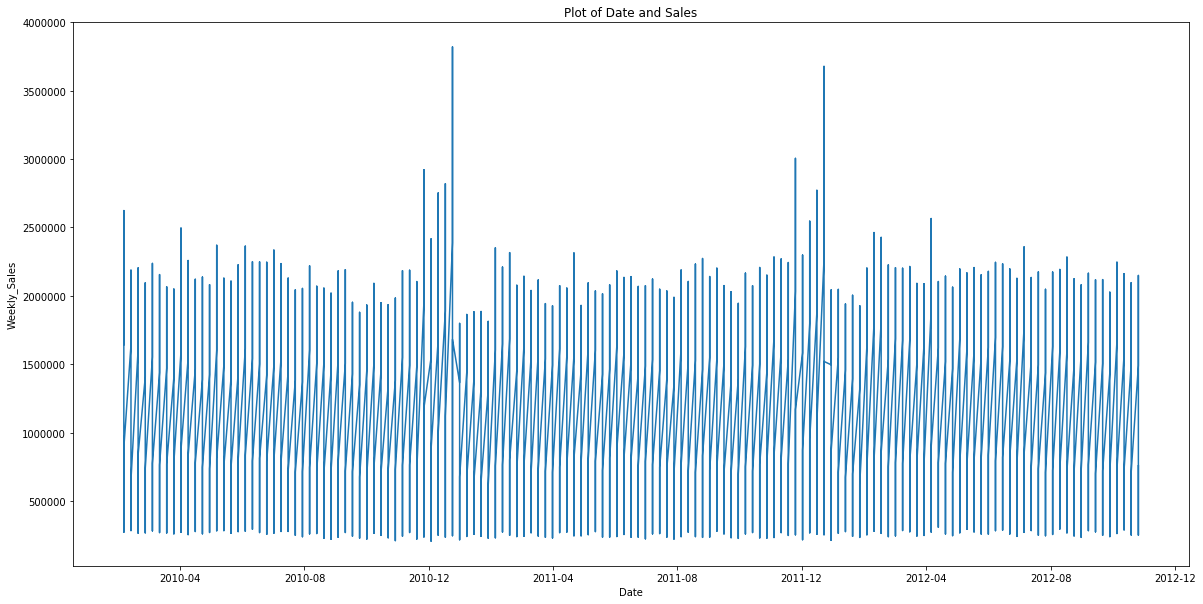

In [749]:
plt.figure(figsize=(20, 10))
plt.plot(train_group_by_date['Date'], train_group_by_date['Weekly_Sales'])
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Plot of Date and Sales")

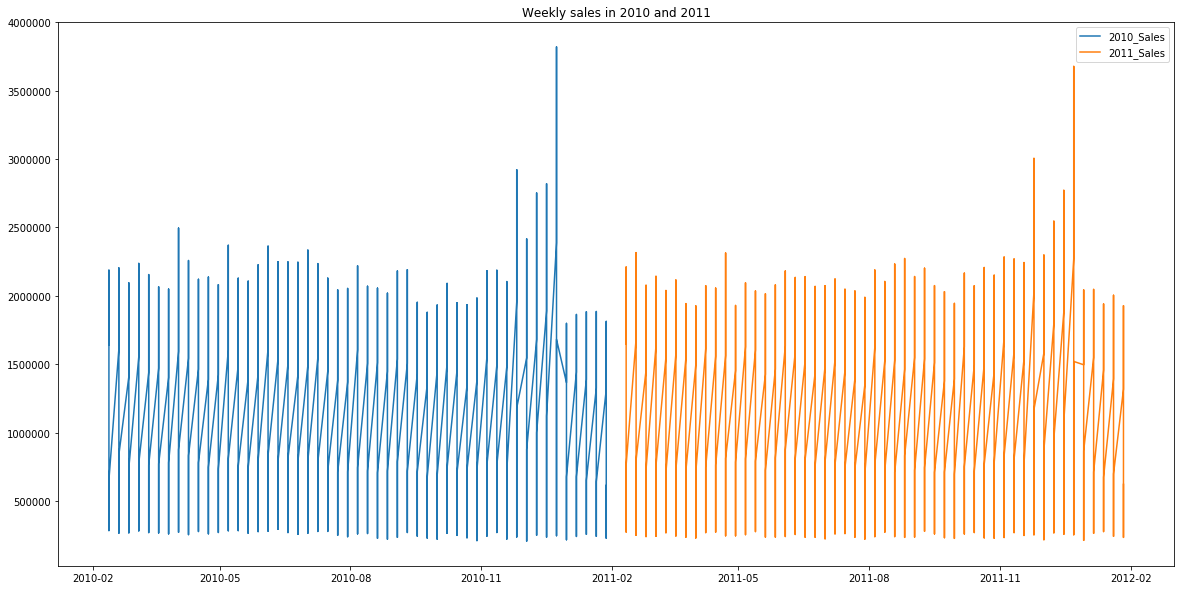

In [750]:
df = train_group_by_date[(train_group_by_date['Date'] > '2010-02-05') & (train_group_by_date['Date'] <= '2011-01-30')]
df1 = train_group_by_date[(train_group_by_date['Date'] > '2011-02-05') & (train_group_by_date['Date'] <= '2012-01-30')]
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Weekly_Sales'], label='2010_Sales')
plt.plot(df1['Date'], df1['Weekly_Sales'], label='2011_Sales')
plt.title('Weekly sales in 2010 and 2011')
plt.legend()

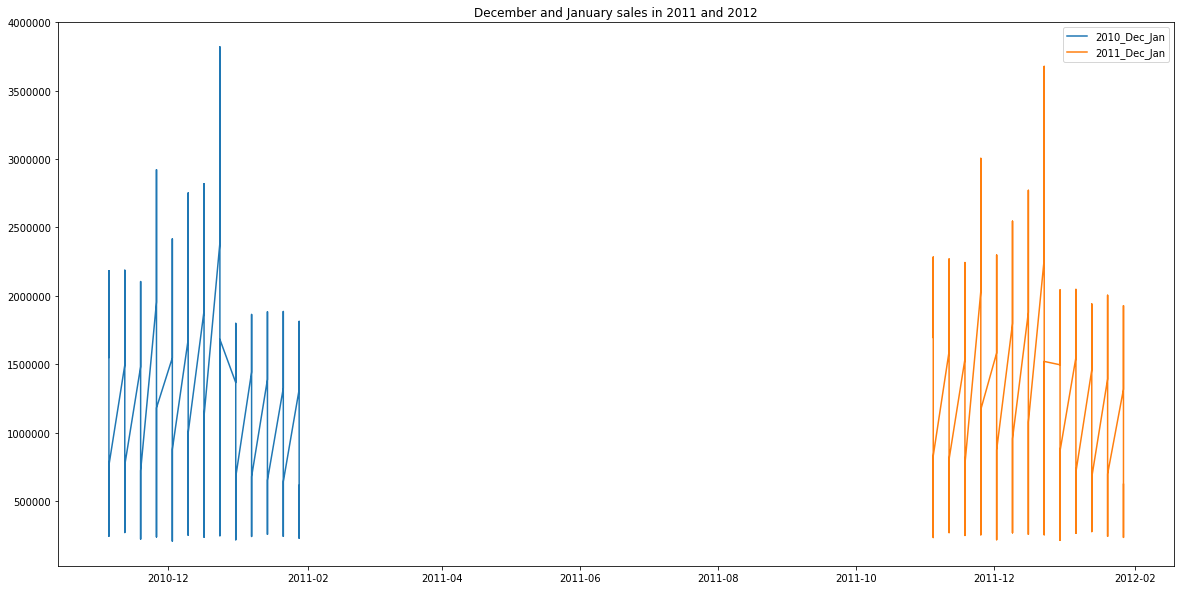

In [751]:
df2 = train_group_by_date[(train_group_by_date['Date'] > '2010-11-01') & (train_group_by_date['Date'] <= '2011-01-30')]
df3 = train_group_by_date[(train_group_by_date['Date'] > '2011-11-01') & (train_group_by_date['Date'] <= '2012-01-30')]
plt.figure(figsize=(20, 10))
plt.plot(df2['Date'], df2['Weekly_Sales'], label='2010_Dec_Jan')
plt.plot(df3['Date'], df3['Weekly_Sales'], label='2011_Dec_Jan')
plt.title('December and January sales in 2011 and 2012')
plt.legend()

In [752]:
#http://www.insightsbot.com/python-one-hot-encoding-with-pandas-made-simple/
#One-Hot-Encoding
dfDummies = pd.get_dummies(train['Type'], prefix = 'category')
train=pd.concat((train, dfDummies), axis=1)
train=train.drop('Type', axis=1)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,category_A,category_B,category_C
0,1,1,2010-02-05,24924.50,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0
1,1,2,2010-02-05,50605.27,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0
2,1,3,2010-02-05,13740.12,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0
3,1,4,2010-02-05,39954.04,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0
4,1,5,2010-02-05,32229.38,False,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,0
421566,45,94,2012-10-26,5203.31,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,0
421567,45,95,2012-10-26,56017.47,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,0
421568,45,97,2012-10-26,6817.48,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,0


In [753]:
#http://www.insightsbot.com/python-one-hot-encoding-with-pandas-made-simple/
#One-Hot-Encoding
dfDummies = pd.get_dummies(test['Type'], prefix = 'category')
test=pd.concat((test, dfDummies), axis=1)
test=test.drop('Type', axis=1)
test.head()

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,category_A,category_B,category_C
0,1,1,2012-11-02,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
1,1,2,2012-11-02,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
2,1,3,2012-11-02,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
3,1,4,2012-11-02,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0
4,1,5,2012-11-02,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,1,0,0


In [754]:
##Featurizing Date
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Year']=train['Date'].dt.year

In [755]:
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year']=test['Date'].dt.year

In [756]:
train['IsHoliday'] = train['IsHoliday'].map({True: 1, False: 0})
test['IsHoliday'] = test['IsHoliday'].map({True: 1, False: 0})
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,category_A,category_B,category_C,Day,Month,Year
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,1,0,0,5,2,2010
1,1,2,2010-02-05,50605.27,0,151315,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,1,0,0,5,2,2010


In [757]:
train['Temperature']=train['Temperature']/train['Temperature'].max()
train['Size']=train['Size']/train['Size'].max()
train['Fuel_Price']=train['Fuel_Price']/train['Fuel_Price'].max()


test['Temperature']=test['Temperature']/test['Temperature'].max()
test['Size']=test['Size']/test['Size'].max()
test['Fuel_Price']=test['Fuel_Price']/test['Fuel_Price'].max()

#### Constructing the train data set 

In [759]:
#data_y=train['Weekly_Sales']
#train_m = train.merge(Avg_Sales_month, how = 'outer', on = ['Store', 'Dept', 'Month'])

In [760]:
train_m=train
test_m=test

In [761]:
#test_m = test.merge(Avg_Sales_month, how = 'left', on = ['Store', 'Dept', 'Month'])
#test_m['Avg_Sales_month'].mean()
#test_m=test_m.fillna(0)


In [762]:
train_m.sort_values(['Date'], inplace=True)
#test.sort_values(['Date'], inplace=True)

In [763]:
train['Week_number']=train['Date'].dt.week
test['Week_number']=test['Date'].dt.week

In [764]:
train_m['Week_number']=train_m['Date'].dt.week
test_m['Week_number']=test_m['Date'].dt.week

In [765]:
train_m_sort=train_m
train_m_sort.sort_values(['Year', 'Store', 'Dept', 'Week_number'])
train_m.sort_values(['Year', 'Store', 'Dept', 'Week_number'])

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,category_B,category_C,Day,Month,Year,Super_Bowl,Labor_Day,Thanks_Giving,Christmas,Week_number
0,1,1,2010-02-05,24924.50,0,0.688979,0.422508,0.575649,0.00,0.00,...,0,0,5,2,2010,0,0,0,0,5
73,1,1,2010-02-12,46039.49,1,0.688979,0.384562,0.570278,0.00,0.00,...,0,0,12,2,2010,0,0,0,0,6
145,1,1,2010-02-19,41595.55,0,0.688979,0.398742,0.562668,0.00,0.00,...,0,0,19,2,2010,0,0,0,0,7
218,1,1,2010-02-26,19403.54,0,0.688979,0.465648,0.573187,0.00,0.00,...,0,0,26,2,2010,0,0,0,0,8
290,1,1,2010-03-05,21827.90,0,0.688979,0.464350,0.587511,0.00,0.00,...,0,0,5,3,2010,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421302,45,98,2012-09-28,508.37,0,0.538293,0.647893,0.894584,4556.61,20.64,...,1,0,28,9,2012,0,0,0,0,39
421370,45,98,2012-10-05,628.10,0,0.538293,0.647993,0.891898,5046.74,0.00,...,1,0,5,10,2012,0,0,0,0,40
421436,45,98,2012-10-12,1061.02,0,0.538293,0.543938,0.895255,1956.28,0.00,...,1,0,12,10,2012,0,0,0,0,41
421502,45,98,2012-10-19,760.01,0,0.538293,0.563911,0.888317,2004.02,0.00,...,1,0,19,10,2012,0,0,0,0,42


In [766]:
#train.sort_values(['Store', 'Dept', 'Date'], inplace=True)
#test.sort_values(['Store', 'Dept', 'Date'], inplace=True)
#train['IsHoliday']=train['Month'].apply(lambda x: 1 if (x==12 or x==11) else 0)
#test['IsHoliday']=test['Month'].apply(lambda x: 1 if (x==12 or x==11) else 0)

In [767]:
y_train=(train_m['Weekly_Sales'])
test_date_values=test_m['Date']
train_date_values=train_m['Date']
#train_m=train_m.drop('Weekly_Sales', axis=1)
#train_m=train_m.drop('Date', axis=1)
#test_m=test_m.drop('Date', axis=1)
#train_m=train_m.drop('Year', axis=1)
#test_m=test_m.drop('Year', axis=1)




#train=train.drop('Month', axis=1)
#test=test.drop('Month', axis=1)
#train=train.drop(['MarkDown5', 'MarkDown4', 'MarkDown2', 'MarkDown1'], axis=1)

In [768]:
train_m=train_m.drop(['MarkDown5', 'MarkDown4','MarkDown3', 'MarkDown2', 'MarkDown1'], axis=1)
test_m=test_m.drop(['MarkDown5', 'MarkDown4','MarkDown3', 'MarkDown2', 'MarkDown1'], axis=1)

In [769]:
train_m=train_m.drop(['Unemployment', 'CPI'], axis=1)
test_m=test_m.drop(['Unemployment', 'CPI'], axis=1)

In [771]:
#train['Sum_Sales']=train['Sum_Sales']/train['Sum_Sales'].max()

In [772]:
Sales_pre=train.groupby(['Store', 'Dept', 'Week_number', 'Year'], as_index=False)['Weekly_Sales'].mean()
#Sales_pre['pre_sales']=Sales_pre.groupby(['Store', 'Dept', 'Week_number', 'Year'], as_index=False)['Weekly_Sales'].shift(1)
#print(Sales_pre.head(20))

In [773]:
d=Sales_pre.groupby(['Store', 'Dept', 'Week_number'])['Weekly_Sales'].shift(1)

In [774]:
Sales_pre['laggged_values']=d.values
Sales_pre.to_csv('Check.csv')

In [775]:
#df2[list('xab')]  # df2 but only with columns x, a, and b
#df1.merge(df2[list('xab')])
train_m = train_m.merge(Sales_pre[list(['Store', 'Dept', 'Week_number', 'Year', 'laggged_values'])]);train_m

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month,Year,Week_number,laggged_values
0,1,1,2010-02-05,24924.50,0,0.688979,0.422508,0.575649,1,0,0,5,2,2010,5,NaN
1,35,3,2010-02-05,14612.19,0,0.472088,0.271520,0.623098,0,1,0,5,2,2010,5,NaN
2,35,4,2010-02-05,26323.15,0,0.472088,0.271520,0.623098,0,1,0,5,2,2010,5,NaN
3,35,5,2010-02-05,36414.63,0,0.472088,0.271520,0.623098,0,1,0,5,2,2010,5,NaN
4,35,6,2010-02-05,11437.81,0,0.472088,0.271520,0.623098,0,1,0,5,2,2010,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420206,34,14,2012-10-26,8930.71,0,0.719937,0.578690,0.786482,1,0,0,26,10,2012,43,10064.66
420207,34,16,2012-10-26,4841.81,0,0.719937,0.578690,0.786482,1,0,0,26,10,2012,43,4807.35
420208,34,17,2012-10-26,7035.13,0,0.719937,0.578690,0.786482,1,0,0,26,10,2012,43,6929.03
420209,34,20,2012-10-26,2124.60,0,0.719937,0.578690,0.786482,1,0,0,26,10,2012,43,2553.90


In [776]:
#train_m=train_m.drop(['Weekly_Sales'], axis=1)
train_m=train_m.dropna()
train_m.sort_values(['Date'], inplace=True)
y_train=train_m['Weekly_Sales']
train_m=train_m.drop(['Weekly_Sales'], axis=1);train_m

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month,Year,Week_number,laggged_values
151911,1,52,2011-02-04,0,0.688979,0.422109,0.668979,1,0,0,4,2,2011,5,3508.04
153853,24,35,2011-02-04,0,0.928045,0.237967,0.760967,1,0,0,4,2,2011,5,2363.81
153854,24,36,2011-02-04,0,0.928045,0.237967,0.760967,1,0,0,4,2,2011,5,1183.00
153855,24,37,2011-02-04,0,0.928045,0.237967,0.760967,1,0,0,4,2,2011,5,2873.76
153856,24,38,2011-02-04,0,0.928045,0.237967,0.760967,1,0,0,4,2,2011,5,67626.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418244,30,90,2012-10-26,0,0.195736,0.704014,0.784691,0,0,1,26,10,2012,43,34998.98
418245,11,35,2012-10-26,0,0.944801,0.741562,0.784691,1,0,0,26,10,2012,43,3594.66
418246,11,33,2012-10-26,0,0.944801,0.741562,0.784691,1,0,0,26,10,2012,43,8171.20
418248,44,83,2012-10-26,0,0.181721,0.469043,0.840421,0,0,1,26,10,2012,43,692.29


In [777]:
train_m=train_m.drop(['Date'], axis=1)

In [778]:
train_m=train_m[['Store', 'Dept', 'Week_number', 'Year', 'laggged_values', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month']]

In [779]:
train_m

,Store,Dept,Week_number,Year,laggged_values,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month
151911,1,52,5,2011,3508.04,0,0.688979,0.422109,0.668979,1,0,0,4,2
153853,24,35,5,2011,2363.81,0,0.928045,0.237967,0.760967,1,0,0,4,2
153854,24,36,5,2011,1183.00,0,0.928045,0.237967,0.760967,1,0,0,4,2
153855,24,37,5,2011,2873.76,0,0.928045,0.237967,0.760967,1,0,0,4,2
153856,24,38,5,2011,67626.61,0,0.928045,0.237967,0.760967,1,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418244,30,90,43,2012,34998.98,0,0.195736,0.704014,0.784691,0,0,1,26,10
418245,11,35,43,2012,3594.66,0,0.944801,0.741562,0.784691,1,0,0,26,10
418246,11,33,43,2012,8171.20,0,0.944801,0.741562,0.784691,1,0,0,26,10
418248,44,83,43,2012,692.29,0,0.181721,0.469043,0.840421,0,0,1,26,10


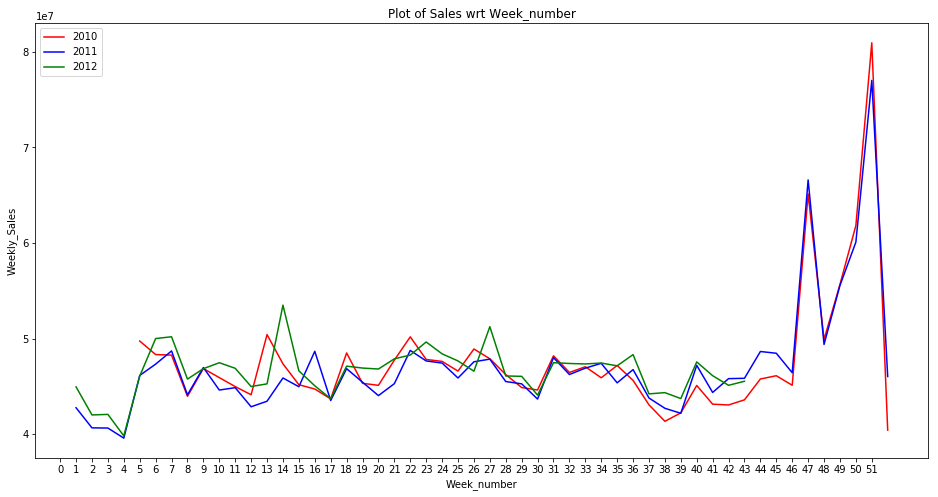

In [780]:
train_m_gr_2010=train.loc[train.Year==2010]
train_m_gr_2010=train_m_gr_2010.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
train_m_gr_2011=train.loc[train.Year==2011]
train_m_gr_2011=train_m_gr_2011.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
train_m_gr_2012=train.loc[train.Year==2012]
train_m_gr_2012=train_m_gr_2012.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
#train_m_gr
plt.figure(figsize=(16, 8))
plt.plot(train_m_gr_2010.Week_number, train_m_gr_2010.Weekly_Sales, 'r', label='2010')
plt.plot(train_m_gr_2011.Week_number, train_m_gr_2011.Weekly_Sales, 'b', label='2011')
plt.plot(train_m_gr_2012.Week_number, train_m_gr_2012.Weekly_Sales, 'g', label='2012')
plt.title("Plot of Sales wrt Week_number")
plt.xlabel("Week_number")
plt.ylabel("Weekly_Sales")
plt.xticks(np.arange(0, len(train_m_gr_2011.Week_number)))
plt.legend()

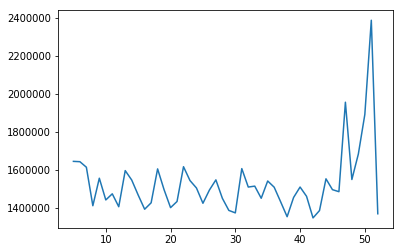

In [781]:
train_m_gr_2010=train[(train.Year==2010) & (train.Store==1)]
train_m_gr_2010=train_m_gr_2010.groupby(['Store', 'Week_number'])['Weekly_Sales'].sum().reset_index()
plt.plot(train_m_gr_2010.Week_number, train_m_gr_2010.Weekly_Sales)

In [ ]:
#train_m['Temperature']=train_m['Temperature']/train_m['Temperature'].max()
#train_m['Size']=train_m['Size']/train_m['Size'].max()
#train_m['Fuel_Price']=train_m['Fuel_Price']/train_m['Fuel_Price'].max()


### Using Linear Regression

In [782]:
from sklearn.model_selection import train_test_split
#X_train, X_test= np.split(train_m, [int(.80 *len(train_m))])
#y_tr, y_test= np.split((y_train), [int(.80 *len(y_train))])

X_train, X_test, y_tr, y_test=train_test_split(train_m, y_train, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#X_train_std = std.fit_transform(X_train)
#X_test_std = std.transform(X_test)


X_train_std = X_train
X_test_std = X_test



In [783]:
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(X_train_std, (y_tr))

In [784]:
lr_reg.intercept_
y_pred = lr_reg.predict(X_test_std)
#y_pred_normal=np.exp(y_pred)
#y_tr_normal=np.exp(y_tr)
#y_test_normal=np.exp(y_test)

In [785]:
#X_test=X_test.drop(['pred_value', 'Weely_Sales'], axis=1)
np.sqrt((np.subtract(y_pred, y_test)**2).mean())

4160.279071835731

In [786]:
y_pred = lr_reg.predict(X_train_std)
#y_pred_normal=np.exp(y_pred)
#lr_train_predictions = [round(value) for value in y_pred]
np.sqrt((np.subtract(y_pred, y_tr)**2).mean())

4080.2428459357693

In [7440]:
'''
X_test['pred_value']=lr_test_predictions
X_test['Weely_Sales']=y_test
te_holidays_1=X_test.loc[X_test['IsHoliday']==1]
MAE1=metrics.mean_absolute_error(te_holidays_1['pred_value'], te_holidays_1['Weely_Sales'])
te_holidays_0=X_test.loc[X_test['IsHoliday']==0]
sub=abs(np.subtract(te_holidays_0['pred_value'], te_holidays_0['Weely_Sales']))
MAE2=0.2*(1/len(sub))*sum(sub*5)

Weighted_MAE=MAE1+MAE2

print("Weighted MAE on test", Weighted_MAE)

'''

'\nX_test[\'pred_value\']=lr_test_predictions\nX_test[\'Weely_Sales\']=y_test\nte_holidays_1=X_test.loc[X_test[\'IsHoliday\']==1]\nMAE1=metrics.mean_absolute_error(te_holidays_1[\'pred_value\'], te_holidays_1[\'Weely_Sales\'])\nte_holidays_0=X_test.loc[X_test[\'IsHoliday\']==0]\nsub=abs(np.subtract(te_holidays_0[\'pred_value\'], te_holidays_0[\'Weely_Sales\']))\nMAE2=0.2*(1/len(sub))*sum(sub*5)\n\nWeighted_MAE=MAE1+MAE2\n\nprint("Weighted MAE on test", Weighted_MAE)\n\n'

## Using Random Forest Regressor

In [937]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
regressor=RandomForestRegressor()



def score(x, y):
    return np.sqrt((np.subtract(x, y)**2).mean())

rmse_score=make_scorer(score, greater_is_better = False)
    

parameters={'max_depth':[7, 9, 11, 13], 'n_estimators':[60, 80, 100, 150, 200, 250]}
#scores = ['precision', 'recall']
model=GridSearchCV(regressor, parameters, scoring = 'r2', cv=2,  return_train_score=True, n_jobs=4)
model.fit(X_train, y_tr)
print(model.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [1014]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
regressor=RandomForestRegressor()
regr1 = RandomForestRegressor(max_depth=11,n_estimators=300, n_jobs=-1)
#regr1 = RandomForestRegressor(max_features='sqrt', n_estimators=300, max_depth=9, n_jobs=-1)
regr1.fit(X_train_std, y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [1018]:
y_pred = regr1.predict(X_train_std)
print("MSE with Random Forest on train", np.sqrt((np.subtract(y_pred, y_tr)**2).mean()))
#y_pred_normal=np.exp(y_pred)
#rf_train_predictions = [round(value) for value in y_pred]

#y_tr_normal=np.exp(y_tr)
#y_test_normal=np.exp(y_test)

MSE with Random Forest on train 3032.313084552519


In [1019]:
#X_test=X_test.drop(['pred_value', 'Weely_Sales'], axis=1)
y_pred = regr1.predict(X_test_std)
#y_pred_normal=np.exp(y_pred)
#rf_test_predictions = [round(value) for value in y_pred]
print("MSE with Random Forest on test", np.sqrt((np.subtract(y_pred, y_test)**2).mean()))

MSE with Random Forest on test 3612.596244739934


In [1017]:
metrics.mean_absolute_error(y_pred, y_test)

1750.3236969266998

### Usiong XGBoost Regressor

In [ ]:
import xgboost as xgb

regressor_xg=xgb.XGBRegressor()

def score(x, y):
    return np.sqrt((np.subtract(x, y)**2).mean())

rmse_score=make_scorer(score, greater_is_better = False)

parameters={'max_depth':[3, 5, 7, 9], 'n_estimators':[50, 100, 150, 200]}

#scores = ['precision', 'recall']

model=GridSearchCV(regressor_xg, parameters, scoring = rmse_score, cv=2,  return_train_score=True, n_jobs=3)

model.fit(X_train, y_tr)
print("Test Scores", model.cv_results_['mean_test_score'])

print('='*50)
print("Train Scores", model.cv_results_['mean_train_score'])

print('='*50)
print(model.cv_results_['params'])
print('='*50)

mean_train_score=model.cv_results_['mean_train_score']
mean_test_score=model.cv_results_['mean_test_score']
params=model.cv_results_['params']
print(model.best_estimator_)

In [1053]:
import xgboost as xgb

regressor_xg=xgb.XGBRegressor()
x_model = xgb.XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators=500 , max_depth= 5, learning_rate= 0.5, n_jobs=-1)
x_model.fit(X_train, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [1054]:
y_pred = x_model.predict(X_train_std)
#y_pred_normal=np.exp(y_pred)
#xg_train_predictions = [round(value) for value in y_pred]
#y_tr_normal=np.exp(y_tr)
#y_test_normal=np.exp(y_test)

In [1055]:
print("Train MSE with Xgboost:", np.sqrt((np.subtract(y_pred, y_tr)**2).mean()))

Train MSE with Xgboost: 1956.56585568726


In [1057]:
#X_test=X_test.drop(['pred_value', 'Weely_Sales'], axis=1)
y_pred = x_model.predict(X_test_std)
#y_pred_normal=np.exp(y_pred)
#xg_test_predictions = [round(value) for value in y_pred]
print("MSE with Xgboost on test", np.sqrt((np.subtract(y_pred, y_test)**2).mean()))

MSE with Xgboost on test 2853.541569105136


### Constructing Test data set

In [1058]:
train_m['Weekly_Sales']=y_train

In [1059]:
test_m_1=test_m.loc[test_m.Year==2012]
test_m_1=test_m_1.sort_values(['Store', 'Dept', 'Week_number'])

In [1060]:
train_m_1=train_m.loc[train_m.Year==2011]
train_m_1.sort_values(['Store', 'Dept', 'Day', 'Month', 'Year'])
#train_m_2=train_m_1.drop(['Year', 'Date'], axis=1)
train_m_2=train_m_1.drop(['Year'], axis=1)
train_m_2=train_m_2.sort_values(['Store', 'Dept', 'Week_number'])
train_m_2=train_m_2[train_m_2.Week_number>=43]

In [1061]:
a=train_m_2.sort_values(['Store', 'Dept', 'Week_number'])

In [1062]:
b=test_m_1.sort_values(['Store', 'Dept', 'Week_number'])

In [1063]:
#mergedCSV = table_1[['t1_a','id']].merge(table_2[['t2_a','id']], on = 'id',how = 'left')
c=test_m_1.merge(train_m_2[['Store', 'Dept', 'Week_number', 'Weekly_Sales']],  on = ['Store', 'Dept', 'Week_number'],how = 'left')

In [1064]:
c=c.drop(['Date'], axis=1)

In [1065]:
c=c[['Store', 'Dept', 'Week_number', 'Year', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month']]
c.columns=['Store', 'Dept', 'Week_number', 'Year', 'laggged_values', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month'];c

,Store,Dept,Week_number,Year,laggged_values,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month
0,1,1,44,2012,39886.06,0,0.688979,0.542619,0.820848,1,0,0,2,11
1,1,1,45,2012,18689.54,0,0.688979,0.600687,0.803394,1,0,0,9,11
2,1,1,46,2012,19050.66,0,0.688979,0.519078,0.788364,1,0,0,16,11
3,1,1,47,2012,20911.25,1,0.688979,0.551545,0.778424,1,0,0,23,11
4,1,1,48,2012,25293.49,0,0.688979,0.513389,0.777455,1,0,0,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26784,45,98,48,2012,538.51,0,0.538293,0.367141,0.904000,0,1,0,30,11
26785,45,98,49,2012,572.72,0,0.538293,0.446591,0.894061,0,1,0,7,12
26786,45,98,50,2012,853.46,0,0.538293,0.427170,0.881697,0,1,0,14,12
26787,45,98,51,2012,1084.78,0,0.538293,0.427072,0.867152,0,1,0,21,12


In [1066]:
c.to_csv("check.csv")
c=c.fillna(0)
#c.isna().sum()

In [1067]:
y_1=x_model.predict(c)
#y_1_rf=regr1.predict(c)

In [1068]:
#c1=c
#c1['Weekly_sales']=y_1_rf
c['Weekly_Sales']=y_1

In [1069]:
test_m_1_2=test_m.loc[test_m.Year==2013]
test_m_1_3=test_m_1_2.drop(['Year', 'Date'], axis=1)
#test_m_1_3

In [1070]:
train_2012=train_m.loc[train_m.Year==2012]
train_2012_1=train_2012
train_2012_1=train_2012_1.sort_values(['Week_number', 'Store', 'Dept'])
#train_2012_1


In [1071]:
train_2012_2 = train_2012_1[['Store', 'Dept', 'Week_number', 'Year', 'laggged_values', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month',  'Weekly_Sales']]
train_2012_2.columns=['Store', 'Dept', 'Week_number', 'Year', 'laggged_values', 'IsHoliday',  'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month',  'Weekly_Sales']


In [1072]:
train_2012_3=pd.concat([train_2012_2, c])
#train_2012_3['ratio']=train_2012_3['Weekly_Sales']/train_2012_3['laggged_values']


In [1073]:
#test_m_1_4=test_m_1_3.merge(train_2012_3, how='left', on=['Store', 'Dept', 'Week_number'])
#test_m_1_4
#d=test_m_1_3.merge(train_2012_3[list(['Store', 'Dept', 'Week_number', 'Weekly_Sales'])]);d
#mergedCSV = table_1[['t1_a','id']].merge(table_2[['t2_a','id']], on = 'id',how = 'left')
d=test_m_1_3.merge(train_2012_3[['Store', 'Dept', 'Week_number', 'Weekly_Sales']],  on = ['Store', 'Dept', 'Week_number'],how = 'left');d

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month,Week_number,Weekly_Sales
0,1,1,0,0.688979,0.409318,0.766303,1,0,0,4,1,1,16567.69
1,1,2,0,0.688979,0.409318,0.766303,1,0,0,4,1,1,44481.38
2,1,3,0,0.688979,0.409318,0.766303,1,0,0,4,1,1,13926.04
3,1,4,0,0.688979,0.409318,0.766303,1,0,0,4,1,1,40925.76
4,1,5,0,0.688979,0.409318,0.766303,1,0,0,4,1,1,23105.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88270,45,93,0,0.538293,0.746052,0.922182,0,1,0,26,7,30,3326.52
88271,45,94,0,0.538293,0.746052,0.922182,0,1,0,26,7,30,4124.28
88272,45,95,0,0.538293,0.746052,0.922182,0,1,0,26,7,30,51943.79
88273,45,97,0,0.538293,0.746052,0.922182,0,1,0,26,7,30,6157.29


In [1074]:
d=d.fillna(0)
#d.isna().sum()
#test_m_1_4['ratio']=test_m_1_4['Weekly_Sales']/test_m_1_4['laggged_values']

In [1075]:
d['Year']=2013

In [1076]:
d=d[['Store', 'Dept', 'Week_number', 'Year', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month']]


In [1077]:
d.columns=['Store', 'Dept', 'Week_number', 'Year', 'laggged_values', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'category_A', 'category_B', 'category_C', 'Day', 'Month']
#test_m_1_6.fillna(method='ffill', inplace=True)
#test_m_1_6.fillna(test_m_1_6.groupby(['Store', 'Dept', 'Week_number'])['laggged_values'].ffill(), inplace=True)


In [1078]:
d=d.sort_values(['Store', 'Dept'])
#test_m_1_6=test_m_1_6.fillna(method='ffill')
#d.isna().sum()

In [1079]:
y_2=x_model.predict(d)
#y_2_rf=regr1.predict(d)

In [1080]:
#d1=d
d['Weekly_Sales']=y_2
#d1['Weekly_Sales']=y_2_rf

In [1081]:
test_m_final=pd.concat([c, d])
#test_m_final_2=pd.concat([c1, d1])

In [1082]:
test_m_final.sort_values(['Store', 'Dept'], inplace=True)
#test_m_final_2.sort_values(['Store', 'Dept'], inplace=True)

In [1083]:
test_m_final

,Store,Dept,Week_number,Year,laggged_values,IsHoliday,Size,Temperature,Fuel_Price,category_A,category_B,category_C,Day,Month,Weekly_Sales
0,1,1,44,2012,39886.06,0,0.688979,0.542619,0.820848,1,0,0,2,11,43872.371094
1,1,1,45,2012,18689.54,0,0.688979,0.600687,0.803394,1,0,0,9,11,19719.185547
2,1,1,46,2012,19050.66,0,0.688979,0.519078,0.788364,1,0,0,16,11,20555.107422
3,1,1,47,2012,20911.25,1,0.688979,0.551545,0.778424,1,0,0,23,11,22933.107422
4,1,1,48,2012,25293.49,0,0.688979,0.513389,0.777455,1,0,0,30,11,24537.441406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88009,45,98,26,2013,690.52,0,0.538293,0.745954,0.882182,0,1,0,28,6,1015.304016
88074,45,98,27,2013,659.65,0,0.538293,0.760177,0.876121,0,1,0,5,7,1083.070312
88141,45,98,28,2013,695.21,0,0.538293,0.778519,0.876121,0,1,0,12,7,1005.388916
88208,45,98,29,2013,845.30,0,0.538293,0.812555,0.905939,0,1,0,19,7,663.841919


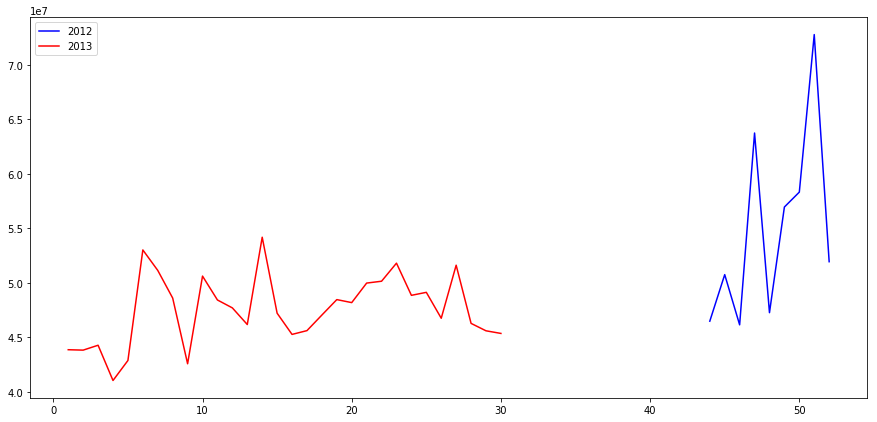

In [1084]:
test_m_final_gr=test_m_final.loc[test_m_final.Year==2013]
test_m_final_gr=test_m_final_gr.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
test_m_final_gr_1=test_m_final.loc[test_m_final.Year==2012]
test_m_final_gr_1=test_m_final_gr_1.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15, 7))
plt.plot(test_m_final_gr_1.Week_number, test_m_final_gr_1.Weekly_Sales, 'b', label='2012')
plt.plot(test_m_final_gr.Week_number, test_m_final_gr.Weekly_Sales, 'r', label='2013')
plt.legend()

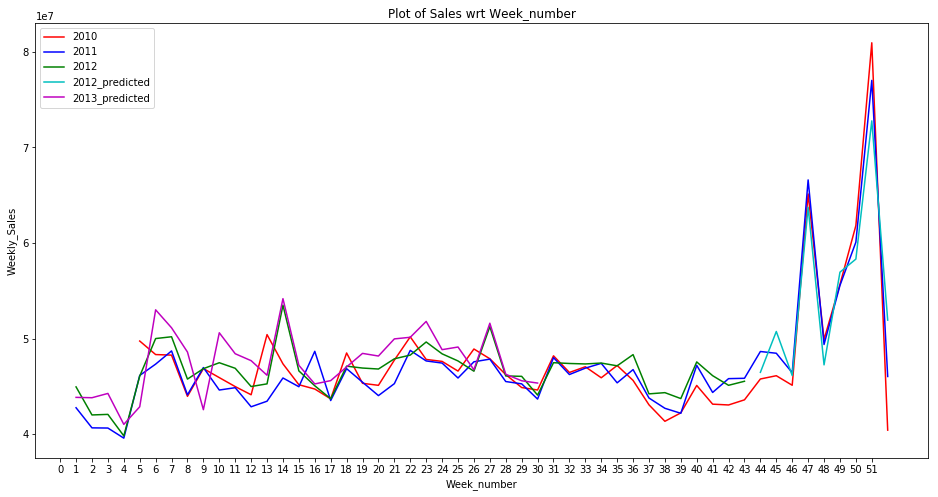

In [1085]:
train_m_gr_2010=train.loc[train.Year==2010]
train_m_gr_2010=train_m_gr_2010.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
train_m_gr_2011=train.loc[train.Year==2011]
train_m_gr_2011=train_m_gr_2011.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
train_m_gr_2012=train.loc[train.Year==2012]
train_m_gr_2012=train_m_gr_2012.groupby(['Week_number'])['Weekly_Sales'].sum().reset_index()
#train_m_gr
plt.figure(figsize=(16, 8))
plt.plot(train_m_gr_2010.Week_number, train_m_gr_2010.Weekly_Sales, 'r', label='2010')
plt.plot(train_m_gr_2011.Week_number, train_m_gr_2011.Weekly_Sales, 'b', label='2011')
plt.plot(train_m_gr_2012.Week_number, train_m_gr_2012.Weekly_Sales, 'g', label='2012')
plt.plot(test_m_final_gr_1.Week_number, test_m_final_gr_1.Weekly_Sales, 'c', label='2012_predicted')
plt.plot(test_m_final_gr.Week_number, test_m_final_gr.Weekly_Sales, 'm', label='2013_predicted')
plt.title("Plot of Sales wrt Week_number")
plt.xlabel("Week_number")
plt.ylabel("Weekly_Sales")
plt.xticks(np.arange(0, len(train_m_gr_2011.Week_number)))
plt.legend()

In [1087]:
test_new_tocsv=pd.DataFrame(test_m_final).to_csv('kaggle6.csv')

##### My Final Kaggle score is obtained by the average of predicted values of Random Forest Regressor and XG Boost Regressor